# Module 2 - Part 2: Gradients and Edge Detection

## 2.4 Image Gradients

A gradient is a measure of the change in the intensity of an image. For color images it is the change in the intensity of each color channel. For grayscale images it is the change in the intensity of each pixel. For example, the following grayscale image has an intensity increase from left to right. An increase in intensity forms a positive gradient.

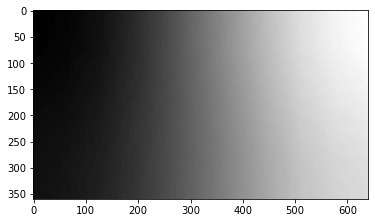

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/gradient.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Show image
plt.imshow(gray, cmap='gray')
plt.show()

When the change in intensity is sudden, we as humans perceive it as discontinuity or as an "edge". Let's load an image in both color and gray scale and see how the color and intensity looks along a specified line. We will use the function `profile_line` fromt he library *skimage* to extract the intensity along a specified line.


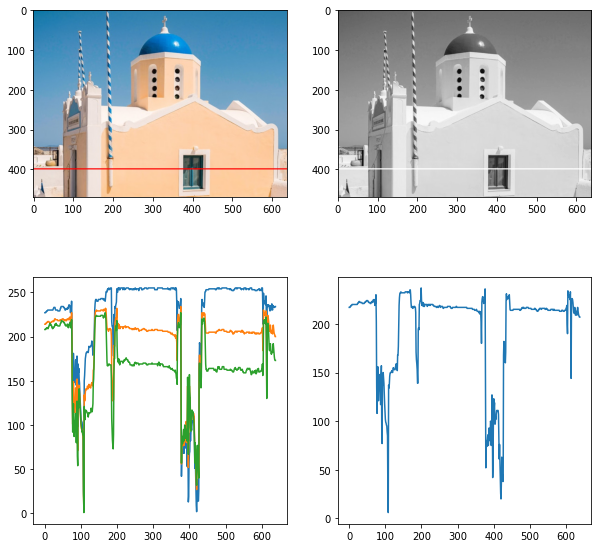

In [2]:
from skimage.measure import profile_line        # Library function for extarcting the color profile of an image along a line

img = cv.imread('data/church.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)        # Convert from BGR to RGB color scheme
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)      # Convert to grayscale

# Extract profile line at raw 400
(x1, y1) = (col1, row1) = (0, 400)              # Start point
(x2, y2) = (col2, row2) = (img.shape[1], 400)   # End point

color_profile = profile_line(img, (row1, col1), (row2, col2))
intensity_profile = profile_line(gray, (row1, col1), (row2, col2))

# Draw a line at raw 400
cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
cv.line(gray, (x1, y1), (x2, y2), (255, 255, 255), 2)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(gray, cmap='gray')
plt.subplot(223)
plt.plot(color_profile)
plt.subplot(224)
plt.plot(intensity_profile)
plt.show()



As we can see, in bright areas the intensity is high and in dark areas it is low. When there is a sudden change in intensity we see a sudden dip or increase in the intensity curve. If we define the intensity along the line as a function $f(x)$, where $x$ is the position along the line, then the gradient is defined as $f'(x) = df/dx$, i.e. as the first derivative of the intensity function.

Let's observe what happens to the intensity and gradient of the intensity on a more simple image at row=200.

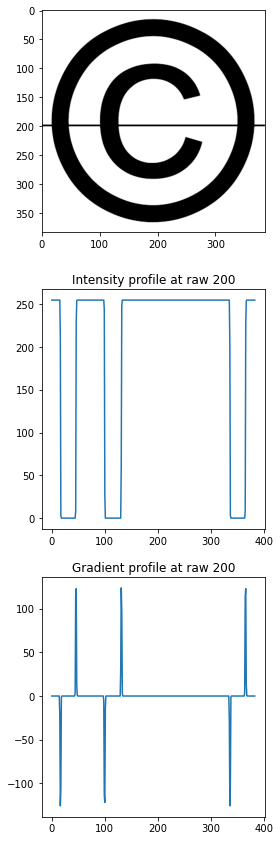

In [3]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

intensity200 = profile_line(img, (200, 0), (200, 383))
grad200 = np.gradient(intensity200)

cv.line(img, (0, 200), (383, 200), (0, 0, 0), 2)

# Show the image, intesity profile and gradient profile
plt.figure(figsize=(4, 15))
plt.subplot(311)
plt.imshow(img, cmap='gray')
plt.subplot(312)
plt.plot(intensity200), plt.title('Intensity profile at raw 200')
plt.subplot(313)
plt.plot(grad200), plt.title('Gradient profile at raw 200')
plt.show()

We can observe that when there is an increase in intensity, the gradient (first derivative of the intensity function) is positive and when there is a decrease in intensity, the gradient is negative.

### Sobel derivatives

The gradient above was calculated along a horizontal line, one pixel thick. If we want to calculate the gradient along all horizontal lines of the image, we repeat the above process for each row of the image, or we can apply a filter that can achieve this effect. One such filter is known as the **Sobel** filter or operator.The Sobel filter is a discrete approximation of the first derivative of the Gaussian filter. The Sobel filter is directional, i.e. it only calculates the gradient along a single direction, eg. along the x-axis (horizontal) or y-axis (vertical).

$$ 
sobelFilterHorizontal = S_x = \begin{bmatrix} 
-1 & 0 & +1  \\
-2 & 0 & +2 \\
-1 & 0 & +1 
\end{bmatrix} 
$$

$$
sobelFilterVertical = S_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$

In OpenCV, the Sobel filter is implemented as the function `cv2.Sobel`. The Sobel filter is a directional filter, so we can specify the direction of the gradient. Let's apply the sobel filter in x and y direction to the copyright image from the previous example.

The parameters of the Sobel filter are:
- img: The image to be filtered.
- ddepth: The depth of the output image. It can be CV_8U, CV_16S, CV_32F, or CV_64F. The input image is a 8-bit/pixel grayscale image or CV_8U. However, we set the output to be of a floating point type. Otherwise, negative gradients will be clipped to 0
- dx: The x-derivative order. It can be 0, 1, or 2.
- dy: The y-derivative order. It can be 0, 1, or 2.
- ksize: The kernel size. It must be odd and the size must be greater than 1.

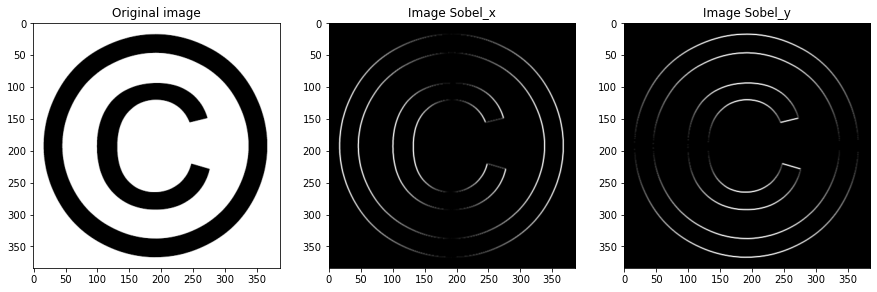

In [26]:
img = cv.imread('data/copyright.png', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)

# Show sobelx and sobely
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(np.abs(img_sobel_x), cmap='gray'), plt.title('Image Sobel_x')
plt.subplot(133)
plt.imshow(np.abs(img_sobel_y), cmap='gray'), plt.title('Image Sobel_y')
plt.show()


We notice that on the x direction the `sobel_x` filter produces a large absolute value for the gradient where the intensity changes abruptly along the x-axis. On the y direction the `sobel_y` filter produces a large absolute value for the gradient where the intensity changes abruptly along the y-axis. 

To get the gradient in all directions, we sum the absolute value of the x and y gradients, or we can take the euclidean norm (aka L2-norm) of the gradient defined as $\sqrt{g_x^2 + g_y^2}$.

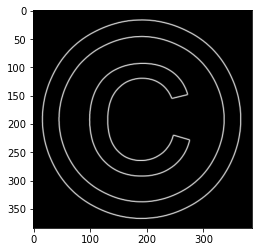

In [27]:
# L2-norm of the gradient
grad = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

# Show grad
plt.imshow(grad, cmap='gray')
plt.show()

Let's apply the same process to the church image from the example above.

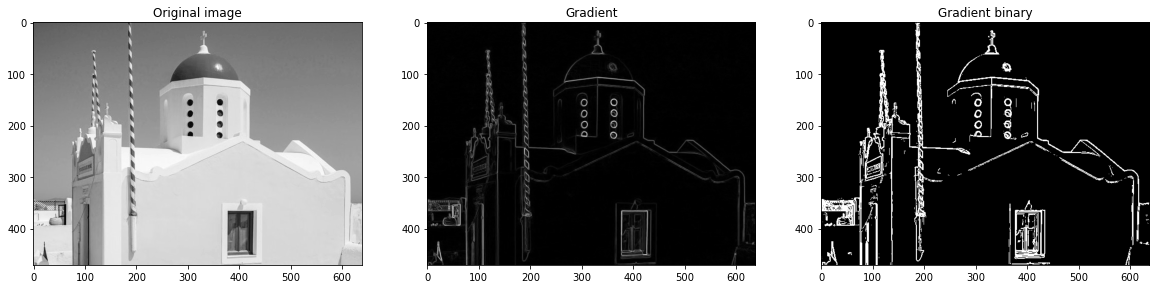

In [56]:
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

img_sobel_x = cv.Sobel(img, cv.CV_64F, dx=1, dy=0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_64F, dx=0, dy=1, ksize=3)
grad = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

thresh, binary_grad = cv.threshold(grad, thresh = 100, maxval = 255, type = cv.THRESH_BINARY)

# Show sobelx and sobely
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(grad, cmap='gray'), plt.title('Gradient')
plt.subplot(133)
plt.imshow(binary_grad, cmap='gray'), plt.title('Gradient binary')
plt.show()

We can also calculate the orientation of of the gradient of each pixel. The orientation is defined as the angle between the x-axis and the gradient vector. The orientation is calculated as $\arctan(g_y/g_x)$. The orientation is a continuous value between $-\pi$ and $\pi$. We can convert the radians to degrees by multiplying by $180/\pi$, or by using the numpy function `np.rad2deg`.

We can use the orientation to calculate the gradient in all directions. Let's calculate the orientation of the gradient of the church image.

In [57]:
import math 

gradient_orientation_rad = np.arctan2(img_sobel_y, img_sobel_x)
gradient_orientation_deg = gradient_orientation_rad * 180 / math.pi # Convert to degrees. Same as: np.rad2deg(gradient_orientation_rad)


# Show gradient orientation at a specific point
print('Gradient orientation at (200, 200) in radians:', gradient_orientation_rad[200, 200])
print('Gradient orientation at (200, 200) in degrees:', gradient_orientation_deg[200, 200])


Gradient orientation at (200, 200) in radians: 1.0636978224025597
Gradient orientation at (200, 200) in degrees: 60.94539590092286


We can see the distribution of the gradient orientations in the image by plotting a histogram of the orientations. Let's plot the histogram of the orientations of the gradient of the church image.

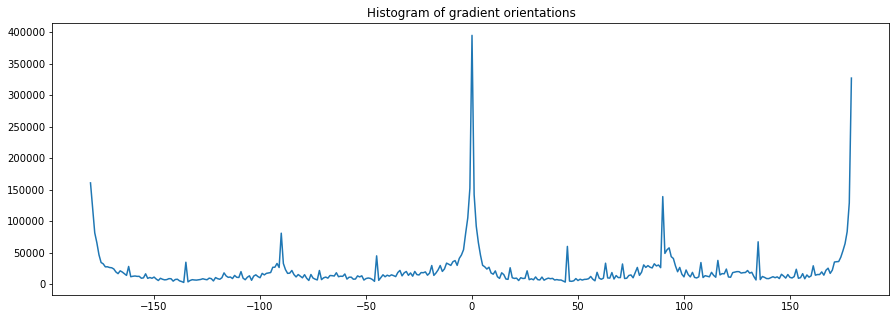

In [58]:
# Get the histogram of the gradient orientations
# See https://numpy.org/doc/stable/reference/generated/numpy.histogram.html for documentation
hist, bins = np.histogram(gradient_orientation_deg, bins=360, range=(-180, 180), weights=grad)

# Show the histogram
plt.figure(figsize=(15, 5))
plt.plot(bins[:-1], hist)
plt.title('Histogram of gradient orientations')
plt.show()

Note that the gradient orientations are given in the range $-\pi$ to $\pi$, or $-180$ to $180$ degrees. We can convert the orientation to the range $0$ to $2\pi$ by adding $\pi$ to the orientation. We can also convert the orientation to the range $0$ to $360$ degrees by multiplying the orientation by $180/\pi$.

In [59]:
# Convert gradient orientations to the range [0, 360]
gradient_orientation_deg = gradient_orientation_rad + math.pi # Convert to [0, 2*pi]
gradient_orientation_deg = gradient_orientation_deg * 180 / math.pi # Convert to degrees 

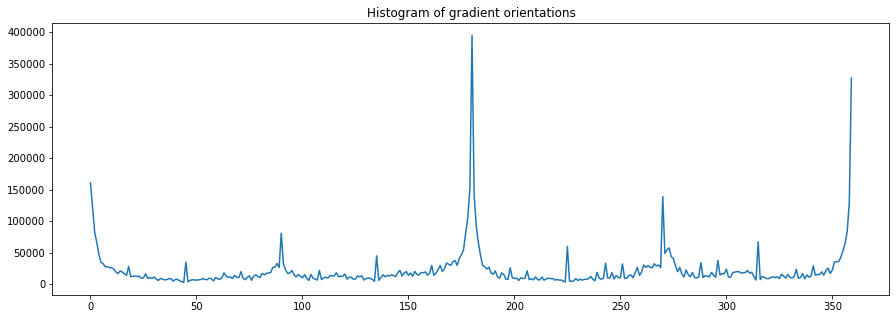

In [60]:
# Get the histogram of the gradient orientations
# See https://numpy.org/doc/stable/reference/generated/numpy.histogram.html for documentation
hist, bins = np.histogram(gradient_orientation_deg, bins=360, range=(0, 360), weights=grad)

# Show the histogram
plt.figure(figsize=(15, 5))
plt.plot(bins[:-1], hist)
plt.title('Histogram of gradient orientations')
plt.show()

We notice that the highest values in the histogram are at the orientations of $0$, $180$, and $360$ degrees. That means the orientation vector is most often pointing in the horizontal direction, either to the left or to the right. Since the gradient orientation vector at each pixel is perpendicular to the edge, we can say that most edges in this image are vertical.

## 2.5 Edge Detection


Edge detection is a popular image processing technique that is used to detect the edges of an image. The edges are defined as the points where the intensity changes abruptly. One way to detect the edges is to use the Sobel filter. However, as we saw in the prevous example, the gradient values returned by the sobel filter, after calculating the gradient in all directions, can be any real number. To decide if a pixel is an edge or not, we need to use a threshold and convert the gradient to a binary value. Depending on the threshold value, the strength of the gradient and the noise levels in the image, the white pixels that we get from this process can be either edges or not edges. 

The **Canny Edge Detector** is an algorithm that tries to solve those problems by following a few simple steps:
- **Step 1**: Blur the image to reduce noise by applying a Gaussian filter.
- **Step 2**: Calculate the gradient in all directions using the Sobel filter.
- **Step 3**: Calculate the magnitude of the gradient at each pixel.
- **Step 4**: Calculate the direction of the gradient at each pixel.
- **Step 5**: Apply a non-maximum suppression to remove spurious edges.
- **Step 6**: Apply a hysteresis threshold to identify the edges.

Let's apply the Canny edge detection to the church image from the example above. The Canny edge detection is implemented as the function `cv2.Canny`. 

The parameters of the Canny edge detection are:
- img: The image to be filtered.
- threshold1: The first threshold for the hysteresis procedure.
- threshold2: The second threshold for the hysteresis procedure.
- apertureSize: The aperture (filter) size for the Sobel operator. Commonly apertureSize=3.
- L2gradient: A flag that indicates whether we want to use a L2-norm (true) or L1-norm (false) for the gradient.
- **Returns**: The edges of the image.
- **See also**: [Canny edge detection](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)


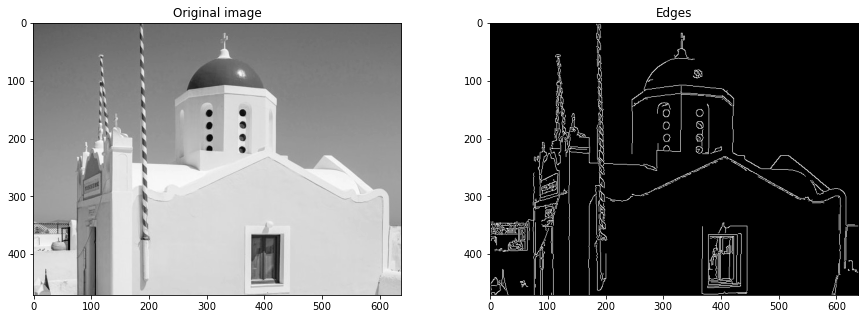

In [7]:
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, threshold1=30, threshold2=200, apertureSize=3, L2gradient=True)    # Canny edge detection

# Show original image and edges
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(122)
plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()


### Discussion on the Canny edge detection
Let's now discuss each one of the parameters of the Canny edge detection in more detail.

#### 1. Blur the image
Bluring the image helps reduce noise and spurious edges. That way we can generate a more "clean" edge image.


#### 2. Calculate the gradient in all directions using the Sobel filter
Applying the Sobel filter in all directions helps to calculate the gradient in all directions. The magnitue and the direction of the gradient at each pixel are calculated and used in the next steps.


#### 3. Calculate the magnitude of the gradient at each pixel
The magnitude of the gradient at each pixel is calculated using the L1 or L2-norm. If $ I_x = dI/dx $ and $ I_y = dI/dy $, then the magnitude of the gradient at each pixel is calculated as:

The L1-norm is the sum of the absolute values of the gradient at each pixel: $ Grad_{L_1} =|I_x|+|I_y| $.

The L2-norm is the square root of the sum of the squares of the gradient at each pixel. $ Grad_{L_2} =\sqrt{I_x^2+I_y^2} $.

Where $ dI/dx $ is the derivative of the intensity with respect to the x-axis and $ dI/dy $ is the derivative of the intensity with respect to the y-axis, as calculated by the Sobel filter.


#### 4. Calculate the direction of the gradient at each pixel
The direction of the gradient is the direction of the fastest change in intensity, and it is a unit vector perpendicular to the edge. The direction of the gradient at each pixel is calculated as the slope $ \theta $ of the gradient vector, using the arctangent of the gradient vector. The arctangent is the angle between the x-axis and the gradient. The angle is measured in radians but it can also be converted to degrees.
$$ \theta = \arctan(I_x/I_y) $$


#### 5. Apply a non-maximum suppression to remove spurious edges
The non-maximum suppression is a technique for making edges one pixel thick. The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions. If the pixel is not in the edge direction, then it is set to 0. If a pixel is in the edge direction but it is not the maximum value, i.e. the strongest pixel in the edge direction, then it is set to 0. If the pixel is in the edge direction and it is the maximum value, then we keep it.


#### 6. Apply a hysteresis threshold to identify the edges
The hysteresis threshold is a technique for deciding if a pixel is an edge pixel or not when binarizing the edge image. The algorithm goes through all the pixels in the image and if the pixel is below the low threshold, then it is set to 0. If the pixel is above the high threshold, then it is set to 1. If the pixel is between the low and high thresholds, then it is set to 1 only if it is connected to a pixel that is above the high threshold. The effect of this process is that it creates more continuous edges.

One question that remains is how to decide the low and high thresholds. The simple way is to try different values and see which one works best visually. A more automated way is to use Otsu's method to determine the high threshold on the non-maximum suppressed gradient magnitude image to generate the high threshold. The low threshold is typically set to 1/2 of the high threshold in this case. Since the gradient magnitude image is continuous-valued without a well-defined maximum, Otsu's method has to be adapted to use value/count pairs instead of a complete histogram. 